In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

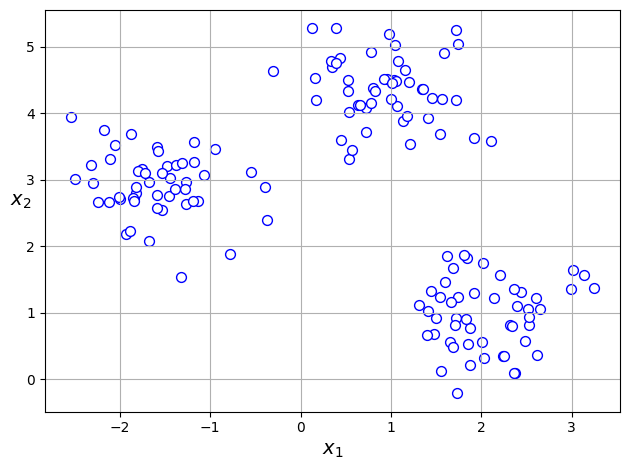

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1],
            c='white', marker='o', edgecolor='blue', s=50)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.grid()
plt.tight_layout()
plt.savefig('blobs_plot.pdf', format='pdf')
plt.show()

In [3]:
from sklearn.cluster import KMeans

k=3
km = KMeans(n_clusters=k)

y_km = km.fit_predict(X)

print(y_km)

[1 2 2 2 1 2 2 1 0 2 1 0 0 2 2 0 0 1 0 1 2 1 2 2 0 1 1 2 0 1 0 0 0 0 2 1 1
 1 2 2 0 0 2 1 1 1 0 2 0 2 1 2 2 1 1 0 2 1 0 2 0 0 0 0 2 0 2 1 2 2 2 1 1 2
 1 2 2 0 0 2 1 1 2 2 1 1 1 0 0 1 1 2 1 2 1 2 0 0 1 1 1 1 0 1 1 2 0 2 2 2 0
 2 1 0 2 0 2 2 0 0 2 1 2 2 1 1 0 1 0 0 0 0 1 0 0 0 2 0 1 0 2 2 1 1 0 0 0 0
 1 1]


In [4]:
centers = km.cluster_centers_
print(centers)

[[-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]]


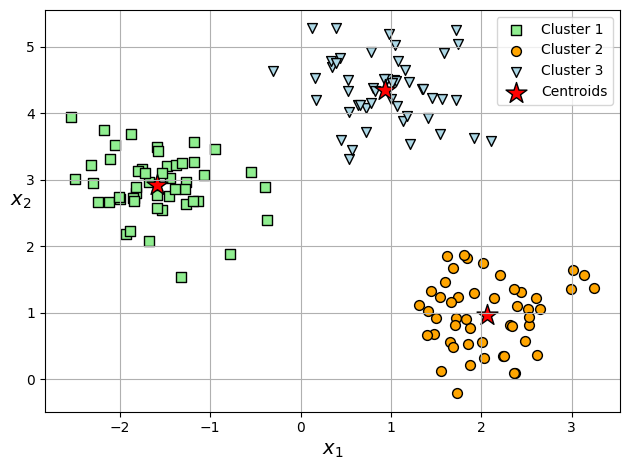

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.grid()
plt.tight_layout()
plt.savefig('kmeans_blobs.pdf', format='pdf')
plt.show()


In [6]:
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

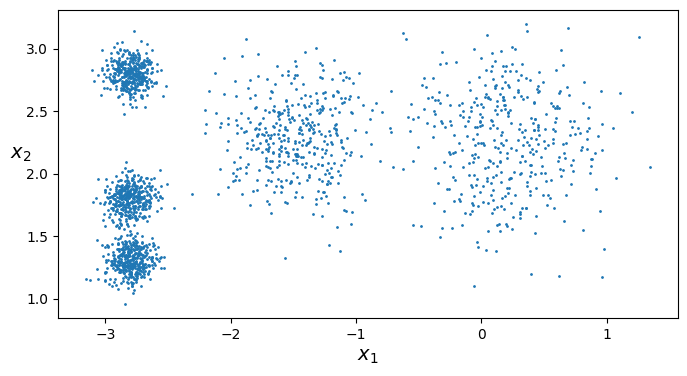

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.savefig("blobs_plot5k.pdf", format='pdf')
plt.show()

In [19]:
from sklearn.cluster import KMeans
k = 5
#kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
y_pred = kmeans.fit_predict(X)

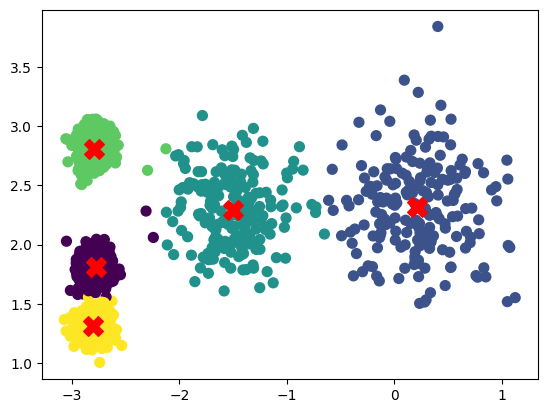

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.show()


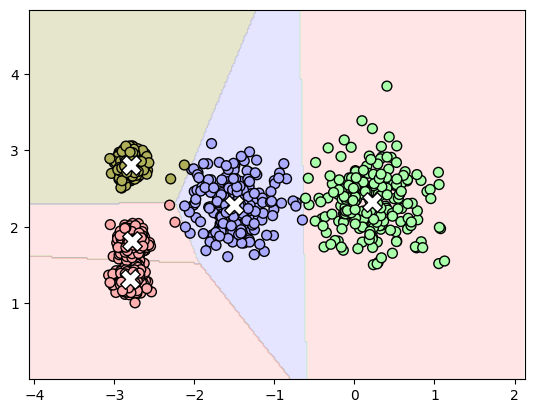

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

# Datos de ejemplo, puedes reemplazar estos datos por los tuyos propios
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# Generación de blobs
X, _ = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=42)

# Aplicar K-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Generación de una malla para graficar las fronteras de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores personalizados para los clusters
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAF5A', '#FFAFAF'])

# Graficar las fronteras de decisión y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap=cmap, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='white', marker='X', edgecolor='k')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
